# Calcolo delle extended pareto grid
Lavoriamo sul toro piatto $T=[0,2\pi]\times[0,2\pi]/(x,0)=(x,2\pi),(0,y)=(2\pi,y)$ con funzioni a valori in $\mathbb{R}^2$ polinomiali periodiche, ovvero in seno e coseno

(per esempio del tipo $(f_1(x,y),f_2(x,y))=(a\ cos(x)^2+b\ cos(y)\ ,\ c\ sin(x)^3+d\ sin(y)^2)$).

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
import numdifftools as nd

In [111]:
#griglia sul toro su cui facciamo i conti

eps=2*np.pi/100
x=[]
for i in np.arange(0,2*np.pi+eps,eps):
    for j in np.arange(0,2*np.pi+eps,eps):
        x.append([i,j])
x=np.array(x)
l=len(x)
print(l) #ok griglia 101*101

10201


### Calcolo punti Pareto Critici
Un punto $(x,y)\in T$ è detto Pareto Critico se $\exists \lambda\le 0$ t.c. $\nabla f_1(x,y)=\lambda\nabla f_2(x,y)$.

Questa condizione equivale a richiedere che:

se $\nabla f_1(x,y)=(a_0,a_1),\ \nabla f_2(x,y)=(b_0,b_1)$, allora $a_0=\lambda b_0$ e $a_1=\lambda b_1$, quindi $\frac{a_0}{b_0}=\lambda=\frac{a_1}{b_1}$ dove queste sono ben definite.

Pertanto valuto questi rapporti, ammettendo una certa tolleranza.

(Dall'articolo: assumiamo per ipotesi che siano finiti e disgiunti l'insieme dei punti critici di $f_1$ e l'insieme dei punti critici di $f_2$, ma in realtà nei due esempi sotto la condizione non è soddisfatta).

In [112]:
def Pareto(f_1,f_2,tol):
    #per ora uso una sola toleranza, come se fosse il mio zero
    cr1=[]  #lista dei punti critici di f_1
    cr2=[]  #lista dei punti critici di f_2
    ppc=[]  #lista dei punti Pareto Critici
    for i in range (0,l,1):
        a=nd.Gradient(f_1)(x[i])
        b=nd.Gradient(f_2)(x[i])
        if a[0]==0 and a[1]==0:       #se ho un punto critico per f_1 la condizione è verificata per qualunque valore del gradiente di f_2
            cr1.append(x[i])
            ppc.append(x[i])
        elif b[0]==0 and b[1]==0:     #se ho un punto critico per f_2 la condizione è verificata per qualunque valore del gradiente di f_1
            cr2.append(x[i])
            ppc.append(x[i])
        elif b[0]==0 and b[1]!=0:
            if abs(a[0])<=tol and a[1]/b[1]<=tol:
                ppc.append(x[i])
        elif b[1]==0 and b[0]!=0:
            if abs(a[1])<=tol and a[0]/b[0]<=tol:
                ppc.append(x[i])
        elif b[0]!=0 and b[1]!=0:
             if abs(a[0]/b[0]-a[1]/b[1])<=tol and (a[0]/b[0]<=tol or a[1]/b[1]<=tol):
                 ppc.append(x[i])
    ppc=np.array(ppc)
    cr1=np.array(cr1)
    cr2=np.array(cr2)
    return ppc,cr1,cr2

# Primo Esempio:

$f_1(x,y)=cos\ x\ \ \ ,\ f_2(x,y)=cos\ y$

$\nabla f_1=(sen\ x,0)\ ,\ \nabla f_2=(0,sen\ y)$

###### Nota: in questo esempio i punti critici sono infiniti

In [113]:
def f_1(x):
    return np.cos(x[0])

def f_2(x):
    return np.cos(x[1])

In [114]:
Pareto0,cr1,cr2=Pareto(f_1,f_2,0)

### Calcolo i punti critici
Infatti sappiamo che i valori critici sono gli estremi degli archi della EPG, faccio un plot per avere un'idea.

Per il momento non ammetto tolleranza

Text(0.5, 1.0, 'Punti Critici - Tolleranza=0')

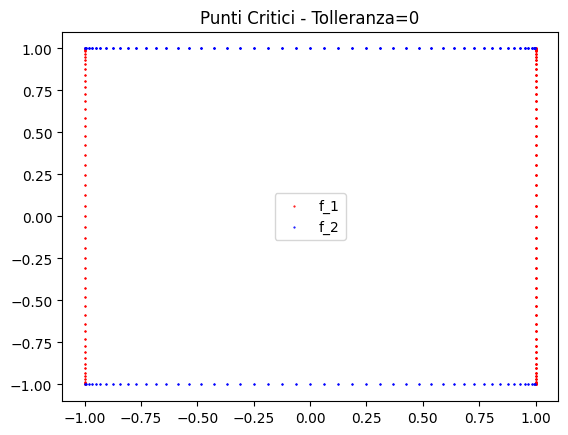

In [115]:
plt.scatter([f_1(c) for c in cr1],[f_2(c) for c in cr1],color='red',s=0.3,label='f_1')
plt.scatter([f_1(c) for c in cr2],[f_2(c) for c in cr2],color='blue',s=0.3,label='f_2')
plt.legend(loc="center")
plt.title('Punti Critici - Tolleranza=0')

### Cosa mi aspetto:
Per la funzione $f(x,y)=(cos\ x,cos\ y)$, con tolleranza 0, come punti Pareto Critici dovrebbero venire fuori solo i punti critici di $f_1$ e $f_2$.

Text(0.5, 1.0, 'Extended Pareto Grid di f - Tolleranza=0')

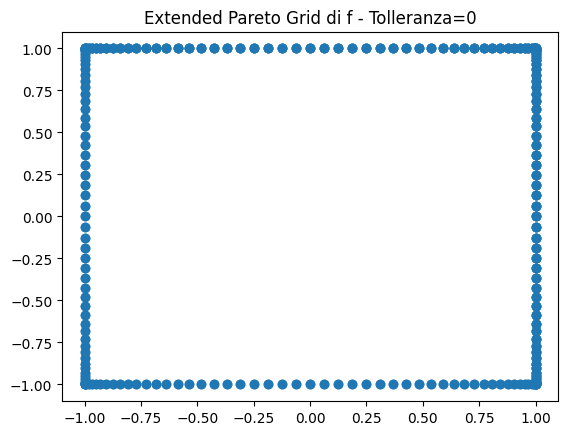

In [116]:
plt.scatter([f_1(p) for p in Pareto0],[f_2(p) for p in Pareto0])
plt.title('Extended Pareto Grid di f - Tolleranza=0')

Text(0.5, 1.0, 'Punti Pareto Critici di f - Tolleranza=0')

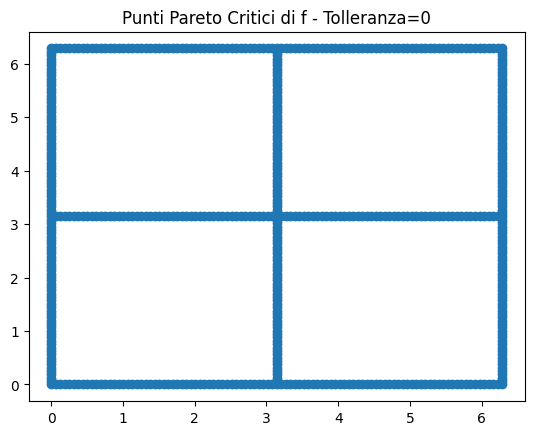

In [117]:
plt.scatter([p[0] for p in Pareto0],[p[1] for p in Pareto0])
plt.title('Punti Pareto Critici di f - Tolleranza=0')

# Secondo Esempio:
$g_1(x,y)=2 cos^2\ x+4\ cos\ y\ \ \ ,\ g_2(x,y)=sin^3\ x+3\ sin^2\ y$

$\nabla g_1=(4 cos\ x\ sen\ x,\ 4 sen\ y),\ \nabla g_2=(3 cos\ x\ sen^2\ x,6 cos\ y sen\ y)$

###### Nota: gli insiemi dei punti critici di $f_1$ e $f_2$ non sono disgiunti

In [118]:
def g_1(x):
    return 2*np.cos(x[0])**2+4*np.cos(x[1])

def g_2(x):
    return 1*np.sin(x[0])**3+3*np.sin(x[1])**2

In [119]:
pareto0,gcr1,gcr2=Pareto(g_1,g_2,0)

Text(0.5, 1.0, 'Punti Critici - Tolleranza=0')

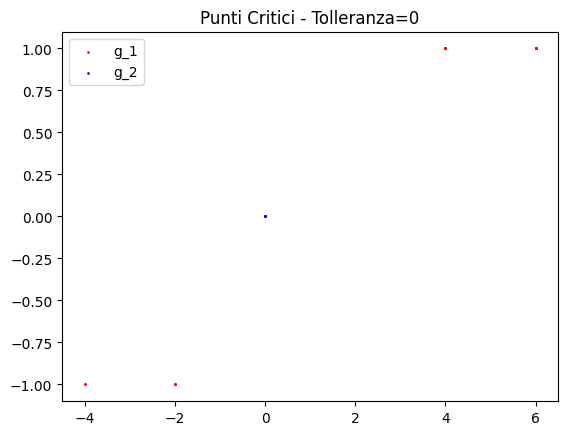

In [120]:
#faccio un plot dei valori critici per avere un'idea
plt.scatter([g_1(c) for c in gcr1],[f_2(c) for c in gcr1],color='red',s=0.8,label='g_1')
plt.scatter([g_1(c) for c in gcr2],[f_2(c) for c in gcr2],color='blue',s=0.8,label='g_2')
plt.legend(loc="upper left")
plt.title('Punti Critici - Tolleranza=0')

Text(0.5, 1.0, 'Extended Pareto Grid di g - Tolleranza=0')

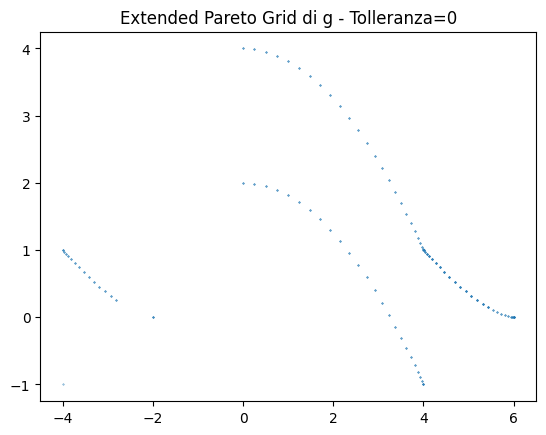

In [121]:
plt.scatter([g_1(p) for p in pareto0],[g_2(p) for p in pareto0],s=0.1)
plt.title('Extended Pareto Grid di g - Tolleranza=0')

Osservazione: facendo i conti a mano, mi risulta che la EPG di $g$ sia $\{ (2 cos^2\ x+2 sen\ x,\ 8 cos^3\ y+3 sen^2\ y)\ |\ x\in [\pi,2\pi],\ y\in [\frac{\pi}{2},\frac{3\pi}{2}]\}$.

Pertanto non mi torna questa EPG: per esempio dovrebbe contenere il punto $(2,-8)$, conti fatti con geogebra.

Text(0.5, 1.0, 'Punti Pareto Critici di g - Tolleranza=0')

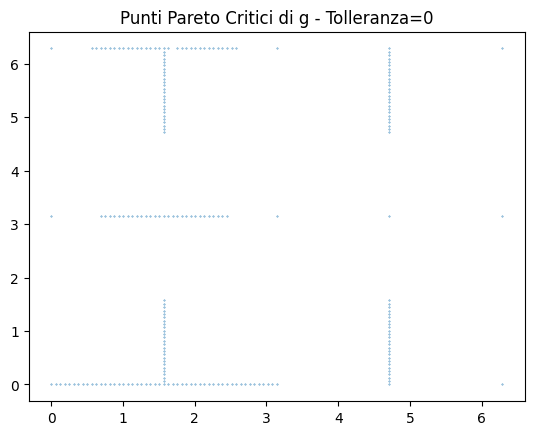

In [122]:
plt.scatter([p[0] for p in pareto0],[p[1] for p in pareto0],s=0.1)
plt.title('Punti Pareto Critici di g - Tolleranza=0')


Provo ad aumentare la tolleranza.

In [123]:
pareto01,gcr1,gcr2=Pareto(g_1,g_2,0.01)

Text(0.5, 1.0, 'Punti Critici - Tolleranza=0.01')

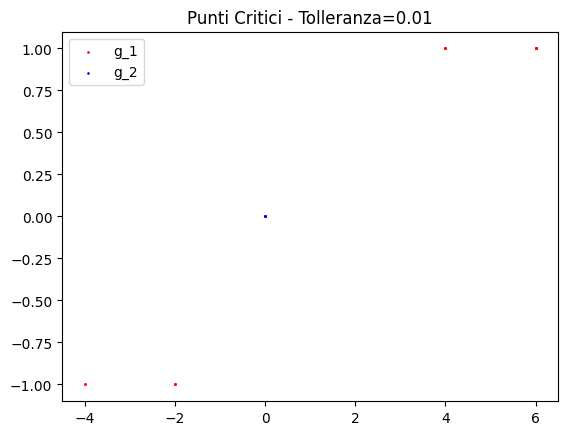

In [124]:
plt.scatter([g_1(c) for c in gcr1],[f_2(c) for c in gcr1],color='red',s=0.8,label='g_1')
plt.scatter([g_1(c) for c in gcr2],[f_2(c) for c in gcr2],color='blue',s=0.8,label='g_2')
plt.legend(loc="upper left")
plt.title('Punti Critici - Tolleranza=0.01')

Text(0.5, 1.0, 'Extended Pareto Grid di g - Tolleranza=0.01')

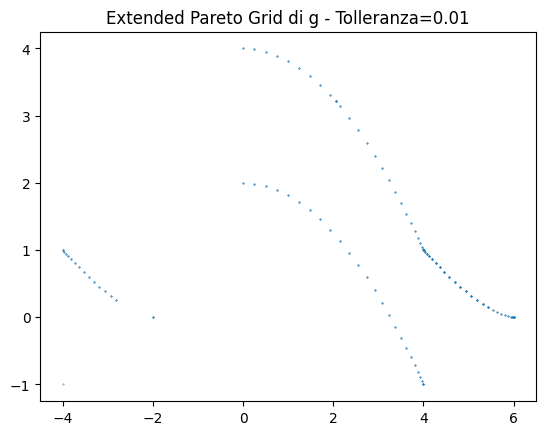

In [125]:
plt.scatter([g_1(p) for p in pareto01],[g_2(p) for p in pareto01],s=0.1)
plt.title('Extended Pareto Grid di g - Tolleranza=0.01')

Osservazione: non cambia assolutamente niente :(

Text(0.5, 1.0, 'Punti Pareto Critici di g - Tolleranza=0.01')

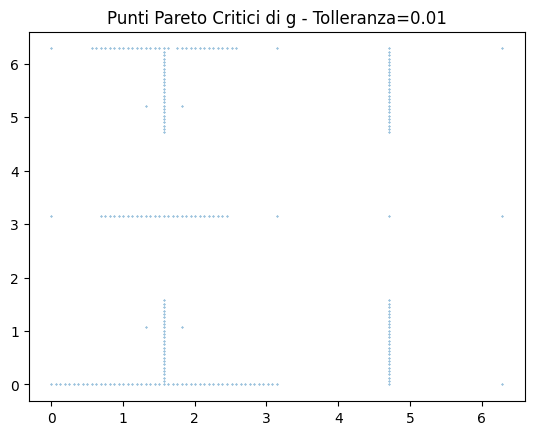

In [126]:
plt.scatter([p[0] for p in pareto01],[p[1] for p in pareto01],s=0.1)
plt.title('Punti Pareto Critici di g - Tolleranza=0.01')